In [1]:
from intent_recognition import *

# Train CNN 1D

In [ ]:
tf.keras.utils.set_random_seed(42)

# Define the hyperparameters and training configuration
vocab_size = 500
embedding_dim = 750
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = True
kernel_size = [3, 5, 7]
filters = [32, 64, 128]

hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

total_combinations = len(kernel_size) * len(filters)
completed_combinations = 0

for ks in kernel_size:
    for f in filters:
        completed_combinations += 1
        progress = (completed_combinations / total_combinations) * 100
        print(f"Progress: {progress:.2f}%")
        # Update hyperparams and train_config
        hyperparams['vocab_size'] = vocab_size
        hyperparams['embedding_dim'] = embedding_dim
        train_config['lemmatize'] = lem
        train_config['use_class_weights'] = use_class_weights
        train_config['use_augmented_data'] = use_augmented_data
        model = Sequential()
        model.add(Conv1D(filters=f, kernel_size=ks, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(128, activation="relu"))
        model.add(Dense(64, activation="relu"))
        basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_ks_{ks}_f_{f}", save_results=True, results_file_name="cnn_results/CNN.csv")
        basic.train_model()
        basic.print_training_information()
        basic.evaluate_model()

In [ ]:
# Define the hyperparameters and training configuration
vocab_size = 500
embedding_dim = 750
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = [True, False]
kernel_size = [3, 5]
filters = [128, 256]

total_combinations = len(kernel_size) * len(filters) * len(use_augmented_data)
completed_combinations = 0

for ks in kernel_size:
    for f in filters:
        for u in use_augmented_data:
            completed_combinations += 1
            progress = (completed_combinations / total_combinations) * 100
            print(f"Progress: {progress:.2f}%")
            # Update hyperparams and train_config
            hyperparams['vocab_size'] = vocab_size
            hyperparams['embedding_dim'] = embedding_dim
            train_config['lemmatize'] = lem
            train_config['use_class_weights'] = use_class_weights
            train_config['use_augmented_data'] = u
            model = Sequential()
            model.add(Conv1D(filters=f, kernel_size=ks, activation='relu'))
            model.add(GlobalMaxPooling1D())
            model.add(Dense(128, activation="relu"))
            model.add(Dense(64, activation="relu"))
            basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_ks_{ks}_f_{f}_augmented_data_{u}", save_results=True, results_file_name="CNN_specific.csv")
            basic.train_model()
            basic.print_training_information()
            basic.evaluate_model()

# Try to increase the embeddings size but using the best hyperparameters

In [ ]:
# Define the hyperparameters and training configuration
vocab_size = 500
embedding_dim = [1024, 2048]
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = True
kernel_size = 5
filters = 128

total_combinations = len(embedding_dim)
completed_combinations = 0

for ed in embedding_dim:
    completed_combinations += 1
    progress = (completed_combinations / total_combinations) * 100
    print(f"Progress: {progress:.2f}%")
    # Update hyperparams and train_config
    hyperparams['vocab_size'] = vocab_size
    hyperparams['embedding_dim'] = ed
    train_config['lemmatize'] = lem
    train_config['use_class_weights'] = use_class_weights
    train_config['use_augmented_data'] = use_augmented_data
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_ed_{ed}", save_results=False)
    basic.train_model()
    basic.print_training_information()
    basic.evaluate_model()

As it doesn't imprtove we will use emb = 750 as before

# Regularization

In [ ]:
vocab_size = 500
embedding_dim = 750
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = True
kernel_size = 5
filters = 128
dropouts = [0.025, 0.05, 0.1]

hyperparams = {'vocab_size': 500, 'embedding_dim': 750, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

for dropout in dropouts:
    hyperparams['vocab_size'] = vocab_size
    hyperparams['embedding_dim'] = embedding_dim
    train_config['lemmatize'] = lem
    train_config['use_class_weights'] = use_class_weights
    train_config['use_augmented_data'] = use_augmented_data
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout))
    basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_dropout_{dropout}", save_results=True, results_file_name="CNN_dropout.csv")
    basic.train_model()
    basic.print_training_information()
    basic.evaluate_model()

# PLOTS

In [5]:
from plot_functions import *
import pandas as pd
df = pd.read_csv('cnn_results/CNN.csv_complete.csv')
df.columns = ['architecture_name', 'summary', 'run_number', 'epoch', 'training_acc',
              'training_f1', 'training_loss', 'val_acc', 'val_f1', 'val_loss',
              'vocab_size', 'embedding_dim', 'epochs', 'batch_size', 'lemmatize',
              'stem', 'remove_stopwords', 'custom_stopwords', 'padding',
              'selection_metric', 'f1_type', 'use_class_weights', 'early_stopping',
              'early_stopping_patience', 'use_augmented_data']
df.to_csv('temp.csv', index=False)
df = pd.read_csv('temp.csv')

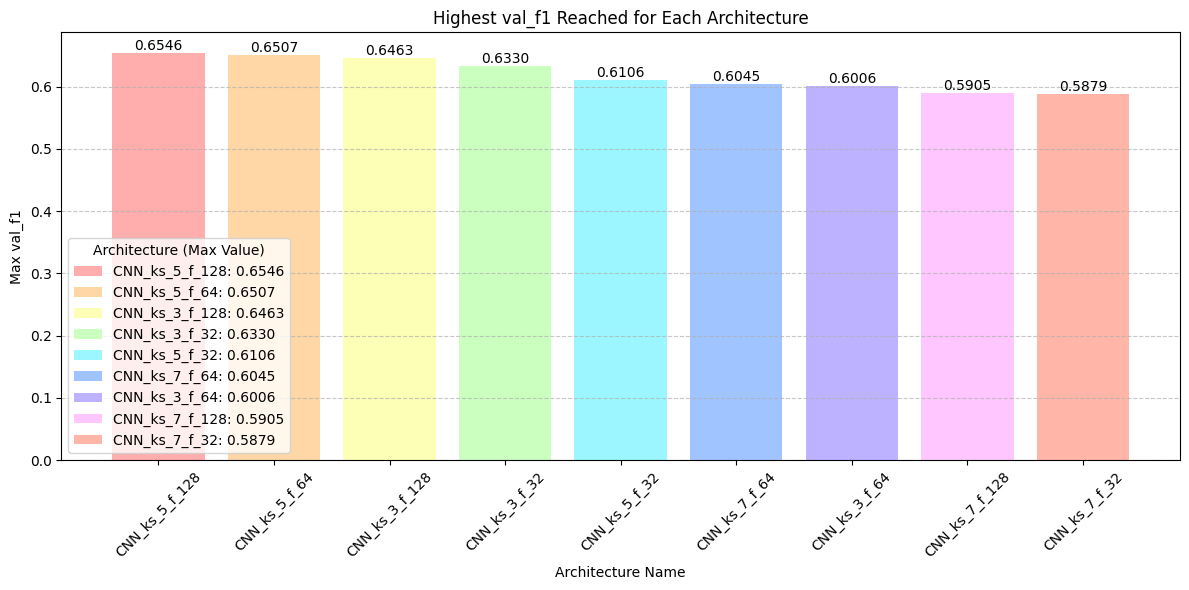

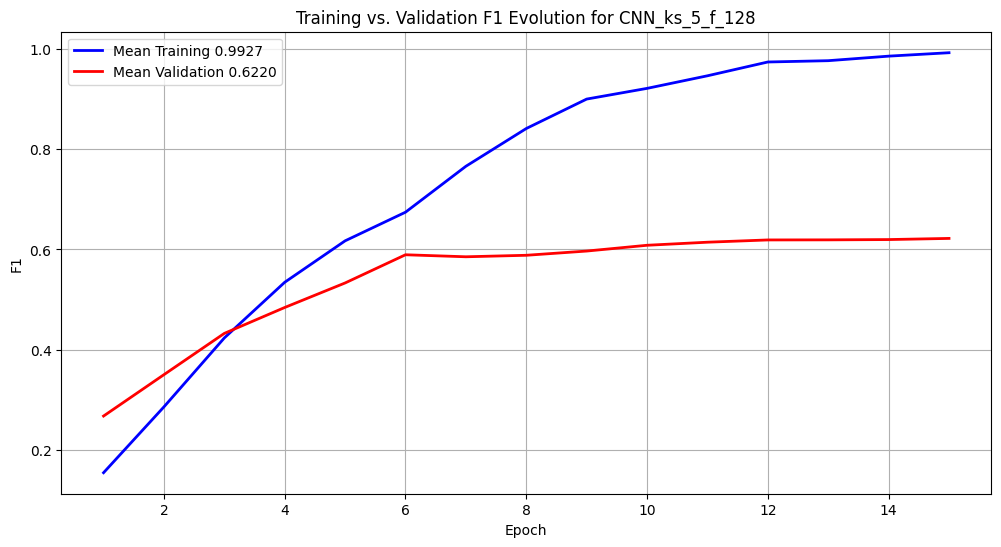

In [11]:
df = pd.read_csv('temp.csv')
plot_highest_bar(df, metric='val_f1', top_n=10)
plot_train_val_comparison(df, metric='f1', architecture_name='CNN_ks_5_f_128')